In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [5]:
data = pd.read_csv('mnist_train.csv')

In [6]:
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [8]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [9]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [10]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)


Iteration:  0
[3 8 2 ... 3 2 2] [7 8 8 ... 9 4 7]
0.054389830508474575
Iteration:  10
[7 9 7 ... 3 7 2] [7 8 8 ... 9 4 7]
0.14584745762711865
Iteration:  20
[7 9 2 ... 3 7 2] [7 8 8 ... 9 4 7]
0.2432033898305085
Iteration:  30
[7 9 2 ... 4 7 1] [7 8 8 ... 9 4 7]
0.318
Iteration:  40
[7 9 2 ... 4 7 7] [7 8 8 ... 9 4 7]
0.37071186440677967
Iteration:  50
[6 9 2 ... 4 7 7] [7 8 8 ... 9 4 7]
0.42977966101694914
Iteration:  60
[0 9 0 ... 4 7 7] [7 8 8 ... 9 4 7]
0.4826101694915254
Iteration:  70
[0 1 0 ... 4 7 7] [7 8 8 ... 9 4 7]
0.5191186440677966
Iteration:  80
[0 1 0 ... 4 4 7] [7 8 8 ... 9 4 7]
0.5522542372881356
Iteration:  90
[6 1 0 ... 4 4 7] [7 8 8 ... 9 4 7]
0.5837966101694915
Iteration:  100
[6 1 0 ... 4 4 7] [7 8 8 ... 9 4 7]
0.6136271186440678
Iteration:  110
[0 1 0 ... 9 4 7] [7 8 8 ... 9 4 7]
0.6401016949152543
Iteration:  120
[0 1 0 ... 9 4 7] [7 8 8 ... 9 4 7]
0.6625762711864407
Iteration:  130
[0 1 0 ... 9 4 7] [7 8 8 ... 9 4 7]
0.6823050847457627
Iteration:  140
[0 1 6 ..

In [11]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print('Prediction: ', prediction)
    print('Label: ', label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [5]
Label:  5


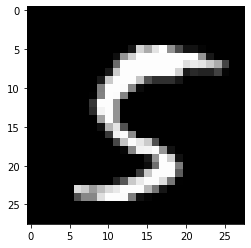

In [13]:
test_prediction(5, W1, b1, W2, b2)

In [14]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[5 7 4 4 7 2 7 2 0 9 7 2 2 7 4 5 3 7 9 5 6 2 8 5 2 8 9 9 2 8 8 5 8 0 5 2 1
 6 9 7 3 9 4 8 1 4 5 7 0 1 9 0 5 2 9 8 2 1 3 2 2 1 3 0 8 6 5 8 7 0 5 2 4 0
 9 1 0 1 7 9 5 3 1 9 8 8 5 7 1 4 0 0 0 9 3 2 8 0 6 7 1 9 8 8 8 3 1 6 6 1 9
 1 8 3 2 3 0 3 1 1 5 2 5 1 8 3 6 6 3 9 3 9 9 8 8 6 3 2 6 3 1 8 8 0 7 0 0 8
 1 5 2 1 6 3 0 5 9 1 3 3 5 5 8 0 9 0 4 9 1 3 1 0 2 4 6 4 1 4 7 3 6 9 7 0 2
 0 8 5 9 7 9 3 9 4 5 5 6 1 7 8 6 5 3 2 0 7 1 7 0 2 7 4 3 4 6 3 5 2 6 1 3 1
 0 1 2 1 1 1 3 9 5 7 5 0 8 0 0 6 3 6 0 9 8 6 3 6 0 8 4 0 9 0 3 8 8 1 4 1 5
 7 5 7 4 9 3 7 4 9 4 7 5 0 4 9 3 4 8 3 7 2 4 4 8 4 4 6 0 2 8 9 1 7 2 9 0 7
 7 0 2 9 6 6 9 8 1 7 5 0 2 3 9 0 6 4 4 9 0 0 6 6 1 0 2 0 4 2 7 3 3 3 9 0 1
 4 7 1 3 9 1 7 1 3 4 1 5 5 1 6 2 4 0 2 1 0 1 8 0 6 2 1 6 0 7 6 4 3 8 5 1 2
 1 2 5 0 6 4 3 3 3 4 7 0 1 4 5 4 9 0 4 1 9 8 5 3 0 9 7 7 8 8 3 8 8 6 9 7 1
 9 0 3 6 0 8 7 0 2 0 2 4 8 1 4 3 1 1 3 1 6 9 9 2 6 2 3 1 2 0 2 6 0 7 7 6 6
 6 7 7 3 9 2 8 8 8 9 7 4 7 3 4 6 3 3 5 6 6 5 0 1 2 7 7 5 4 8 6 9 8 0 0 2 7
 3 0 1 4 1 1 1 4 1 4 9 5 

0.852